In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from itertools import cycle, islice

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN

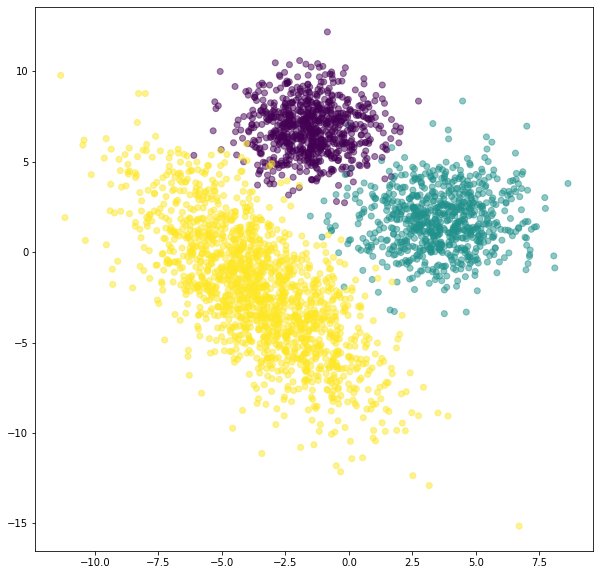

In [2]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [3]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
{0: 750, 1: 750, 2: 1500}

{0: 750, 1: 750, 2: 1500}

In [5]:
dbscan = DBSCAN()

In [6]:
dbscan.fit(X)

DBSCAN()

In [7]:
dbscan.labels_

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

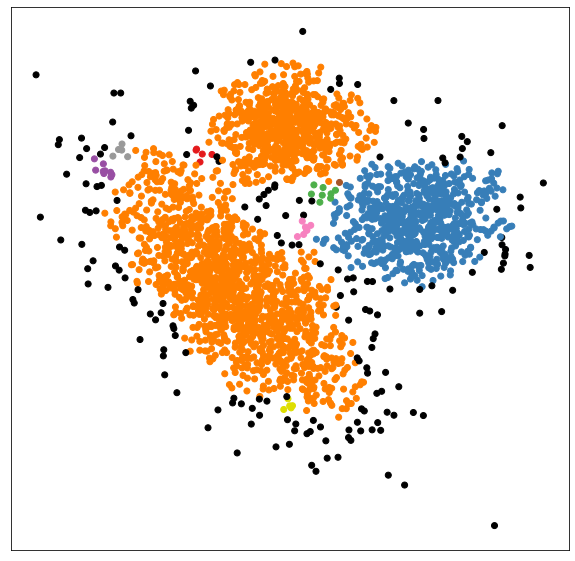

In [13]:
    y_pred = dbscan.labels_.astype(np.int)

    plt.subplot()
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    # чёрным цветом отметим выбросы
    colors = np.append(colors, ["#000000"])
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

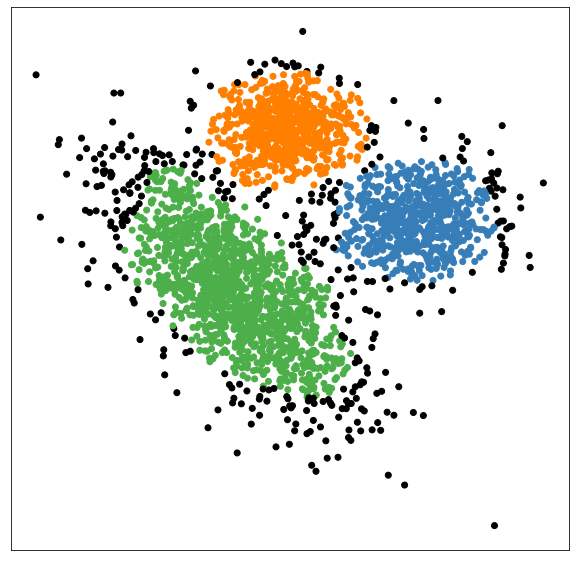

In [15]:
dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int)

plt.subplot()
plt.xticks([]); plt.yticks([])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                     int(max(y_pred) + 1))))
# чёрным цветом отметим выбросы
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

In [18]:
pd.Series(dbscan.labels_).value_counts()

 2    1255
 1     721
 0     656
-1     368
dtype: int64

In [19]:
colors[y_pred]

array(['#377eb8', '#377eb8', '#ff7f00', ..., '#4daf4a', '#4daf4a',
       '#4daf4a'], dtype='<U7')

In [21]:
colors

array(['#377eb8', '#ff7f00', '#4daf4a', '#000000'], dtype='<U7')

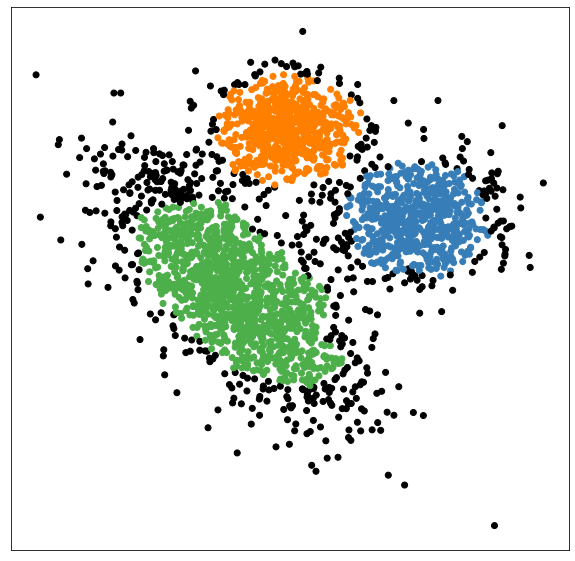

In [26]:
dbscan = DBSCAN(eps=0.8, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int)

plt.subplot()
plt.xticks([]); plt.yticks([])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                     int(max(y_pred) + 1))))
# чёрным цветом отметим выбросы
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

In [27]:
pd.Series(dbscan.labels_).value_counts()

 2    1133
 1     681
 0     603
-1     583
dtype: int64